## Question 1
Use the approach described in Chapter 6.5.1 of Introduction to Statistical Learning to select the best subset of explanatory variables to predict richness.

Note that the approach uses cross-validation.  You do not need to include interaction.


Apply what is in book to RIKZ dataset to compute richness.. find best subset that predicts richness.  

Step AIC 

p values only good bc some variables are in model or some are out.. maybe some p values not sig bc so many other p values.. so flexible and complex

best idea is to test on unseen data using cross validation and picking model with lowest cross validation score
- mean square error
- residual sum of square
- total squared sum of residuals
- SOME MEASURE OF ERROR
- R2? not predictive bc increase with number of parameters

## Inputting Data

In [33]:
library(tidyverse)

In [34]:
survey_data = read.csv("RIKZ.csv")
head(survey_data)

Sample,C1,P1,P2,P3,P4,P5,P6,P7,P8,...,exposure,salinity,temperature,NAP,penetrability,grainsize,humus,chalk,sorting1,Beach
1,4,0,0,0,0,0,1,0,0,...,10,29.4,17.5,0.045,253.9,222.5,0.05,2.05,69.830,1
2,0,0,1,0,0,0,0,0,0,...,10,29.4,17.5,-1.036,226.9,200.0,0.30,2.50,59.000,1
3,0,0,3,0,0,0,0,0,0,...,10,29.4,17.5,-1.336,237.1,194.5,0.10,3.45,59.220,1
4,0,0,0,0,0,0,0,0,0,...,10,29.4,17.5,0.616,248.6,221.0,0.15,1.60,67.750,1
5,1,0,0,0,0,0,0,0,0,...,10,29.4,17.5,-0.684,251.9,202.0,0.05,2.45,57.760,1
6,0,0,0,0,0,1,0,0,0,...,8,29.6,20.8,1.190,250.1,192.5,0.10,2.50,53.075,2


In [35]:
survey_tbl = read_csv("RIKZ.csv")

Parsed with column specification:
cols(
  .default = col_double()
)
See spec(...) for full column specifications.


In [36]:
head(survey_tbl)

Sample,C1,P1,P2,P3,P4,P5,P6,P7,P8,...,exposure,salinity,temperature,NAP,penetrability,grainsize,humus,chalk,sorting1,Beach
1,4,0,0,0,0,0,1,0,0,...,10,29.4,17.5,0.045,253.9,222.5,0.05,2.05,69.830,1
2,0,0,1,0,0,0,0,0,0,...,10,29.4,17.5,-1.036,226.9,200.0,0.30,2.50,59.000,1
3,0,0,3,0,0,0,0,0,0,...,10,29.4,17.5,-1.336,237.1,194.5,0.10,3.45,59.220,1
4,0,0,0,0,0,0,0,0,0,...,10,29.4,17.5,0.616,248.6,221.0,0.15,1.60,67.750,1
5,1,0,0,0,0,0,0,0,0,...,10,29.4,17.5,-0.684,251.9,202.0,0.05,2.45,57.760,1
6,0,0,0,0,0,1,0,0,0,...,8,29.6,20.8,1.190,250.1,192.5,0.10,2.50,53.075,2


In [37]:
survey_data[1,2:76]>0

C1,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,M12,M14,M15,M16,M17,I1,I2,I3,I4,I5
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE


In [38]:
sum(survey_data[1,2:76]>0)

[1] 11

In [39]:
richness = (survey_data[1:45,2:76]>0) %>% apply( 1, sum)
richness

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
11 10 13 11 10  8  9  8 19 17  6  1  4  3  3  1  3  3  1  4  3 22  6  0  6  5 
27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 
 4  1  6  4  2  1  1  3  4  3  5  7  5  0  7 11  3  0  2

In [40]:
survey_data["richness"] = richness
head(survey_data)

Sample,C1,P1,P2,P3,P4,P5,P6,P7,P8,...,salinity,temperature,NAP,penetrability,grainsize,humus,chalk,sorting1,Beach,richness
1,4,0,0,0,0,0,1,0,0,...,29.4,17.5,0.045,253.9,222.5,0.05,2.05,69.830,1,11
2,0,0,1,0,0,0,0,0,0,...,29.4,17.5,-1.036,226.9,200.0,0.30,2.50,59.000,1,10
3,0,0,3,0,0,0,0,0,0,...,29.4,17.5,-1.336,237.1,194.5,0.10,3.45,59.220,1,13
4,0,0,0,0,0,0,0,0,0,...,29.4,17.5,0.616,248.6,221.0,0.15,1.60,67.750,1,11
5,1,0,0,0,0,0,0,0,0,...,29.4,17.5,-0.684,251.9,202.0,0.05,2.45,57.760,1,10
6,0,0,0,0,0,1,0,0,0,...,29.6,20.8,1.190,250.1,192.5,0.10,2.50,53.075,2,8


In [41]:
survey_data_richness = survey_data[ , 77:90]
head(survey_data_richness)

week,angle1,angle2,exposure,salinity,temperature,NAP,penetrability,grainsize,humus,chalk,sorting1,Beach,richness
1,32,96,10,29.4,17.5,0.045,253.9,222.5,0.05,2.05,69.830,1,11
1,62,96,10,29.4,17.5,-1.036,226.9,200.0,0.30,2.50,59.000,1,10
1,65,96,10,29.4,17.5,-1.336,237.1,194.5,0.10,3.45,59.220,1,13
1,55,96,10,29.4,17.5,0.616,248.6,221.0,0.15,1.60,67.750,1,11
1,23,96,10,29.4,17.5,-0.684,251.9,202.0,0.05,2.45,57.760,1,10
1,129,89,8,29.6,20.8,1.190,250.1,192.5,0.10,2.50,53.075,2,8


## Best Subset Selection

regsubsets() function performs best subset selection by identifying best model that contains a given number of predictors (best is quantified using RSS.  

In [42]:
library(leaps)

In [43]:
regfit.full <- regsubsets(richness ~., survey_data_richness)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(richness ~ ., survey_data_richness)
13 Variables  (and intercept)
              Forced in Forced out
week              FALSE      FALSE
angle1            FALSE      FALSE
angle2            FALSE      FALSE
exposure          FALSE      FALSE
salinity          FALSE      FALSE
temperature       FALSE      FALSE
NAP               FALSE      FALSE
penetrability     FALSE      FALSE
grainsize         FALSE      FALSE
humus             FALSE      FALSE
chalk             FALSE      FALSE
sorting1          FALSE      FALSE
Beach             FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         week angle1 angle2 exposure salinity temperature NAP penetrability
1  ( 1 ) " "  " "    " "    "*"      " "      " "         " " " "          
2  ( 1 ) " "  " "    " "    "*"      " "      " "         "*" " "          
3  ( 1 ) " "  " "    " "    "*"      "*"      " "         "*" " "          
4  ( 1 ) " "  " "    " "    

In [44]:
## asterisk indicates given variable is included in corresponding model
## best two-variable mdoel contains exposure and NAP

In [45]:
regfit.full <- regsubsets(richness ~., survey_data_richness, nvmax = 13)
reg.summary <- summary(regfit.full)
reg.summary

Subset selection object
Call: regsubsets.formula(richness ~ ., survey_data_richness, nvmax = 13)
13 Variables  (and intercept)
              Forced in Forced out
week              FALSE      FALSE
angle1            FALSE      FALSE
angle2            FALSE      FALSE
exposure          FALSE      FALSE
salinity          FALSE      FALSE
temperature       FALSE      FALSE
NAP               FALSE      FALSE
penetrability     FALSE      FALSE
grainsize         FALSE      FALSE
humus             FALSE      FALSE
chalk             FALSE      FALSE
sorting1          FALSE      FALSE
Beach             FALSE      FALSE
1 subsets of each size up to 13
Selection Algorithm: exhaustive
          week angle1 angle2 exposure salinity temperature NAP penetrability
1  ( 1 )  " "  " "    " "    "*"      " "      " "         " " " "          
2  ( 1 )  " "  " "    " "    "*"      " "      " "         "*" " "          
3  ( 1 )  " "  " "    " "    "*"      "*"      " "         "*" " "          
4  ( 1 )  "

In [46]:
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [47]:
print(reg.summary$rsq)

 [1] 0.3396289 0.6321333 0.6792648 0.6875366 0.6904720 0.7029031 0.7084642
 [8] 0.7165852 0.7222456 0.7224675 0.7225468 0.7225745 0.7225881


In [48]:
## see that rsq increases
    # from 34% when only 1 variable is included 
    # to 72% when all variables are included 

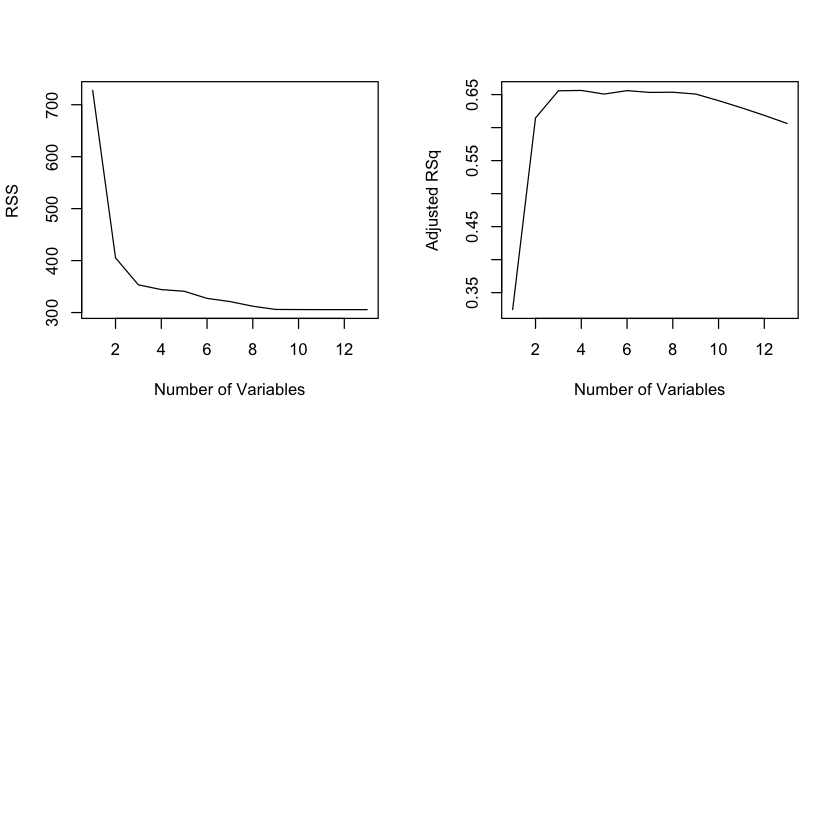

In [49]:
par(mfrow = c(2, 2))
plot(reg.summary$rss , xlab = "Number of Variables",
    ylab = "RSS", type = "l")
plot(reg.summary$adjr2 , xlab = "Number of Variables",
    ylab = "Adjusted RSq", type = "l")

[1] 4

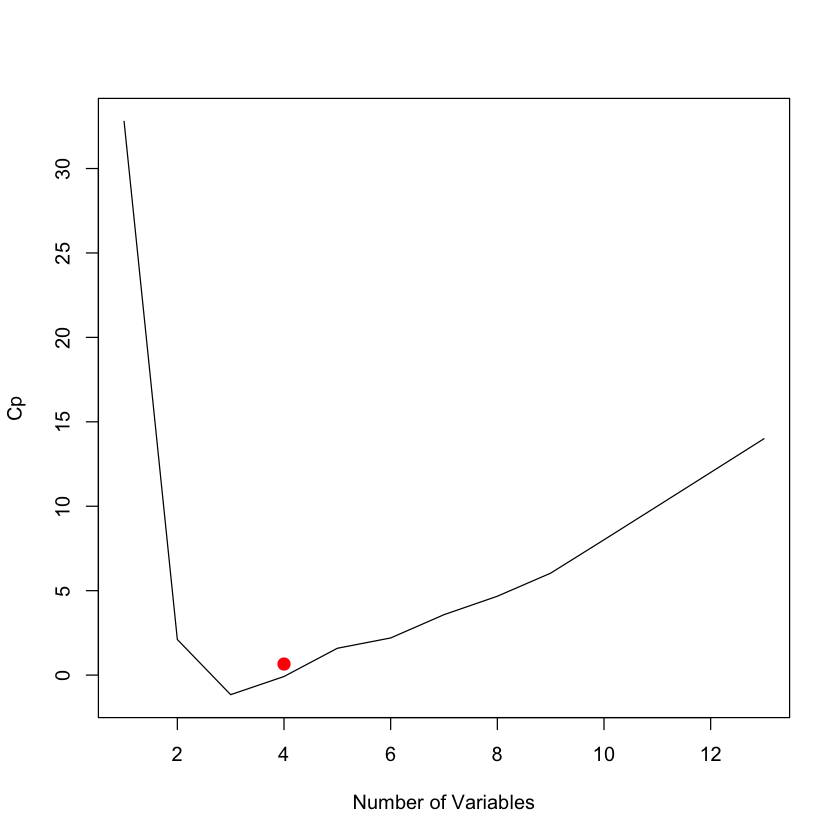

In [50]:
which.max(reg.summary$adjr2)
plot(reg.summary$cp, xlab = "Number of Variables",
    ylab = "Cp", type = "l")
points (4, reg.summary$adjr2 [4] , col = "red", cex = 2,
pch = 20)

[1] 3

[1] 3

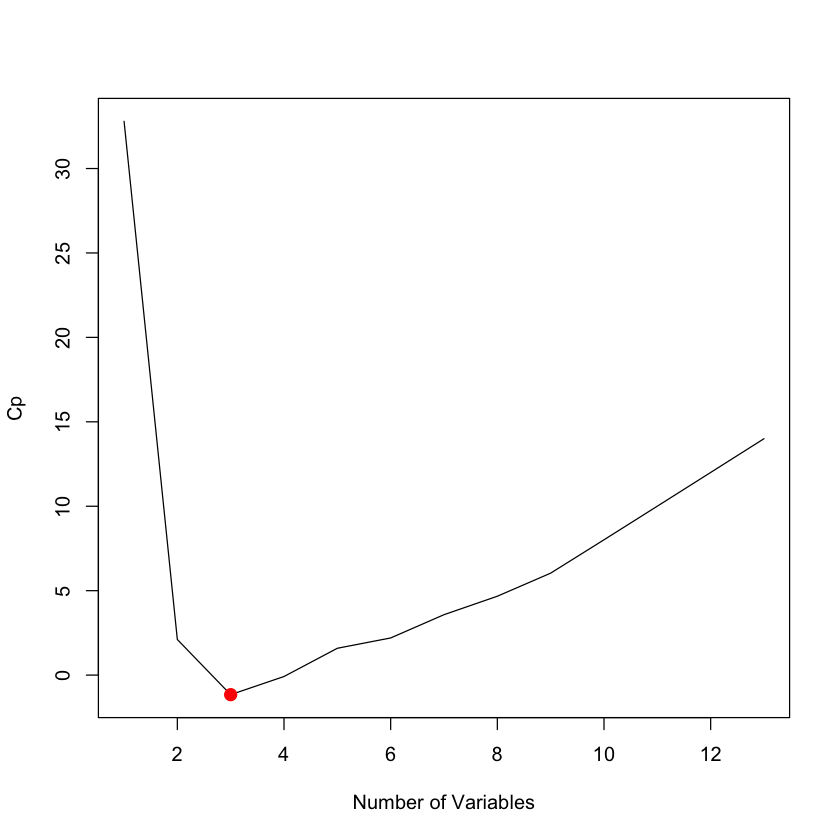

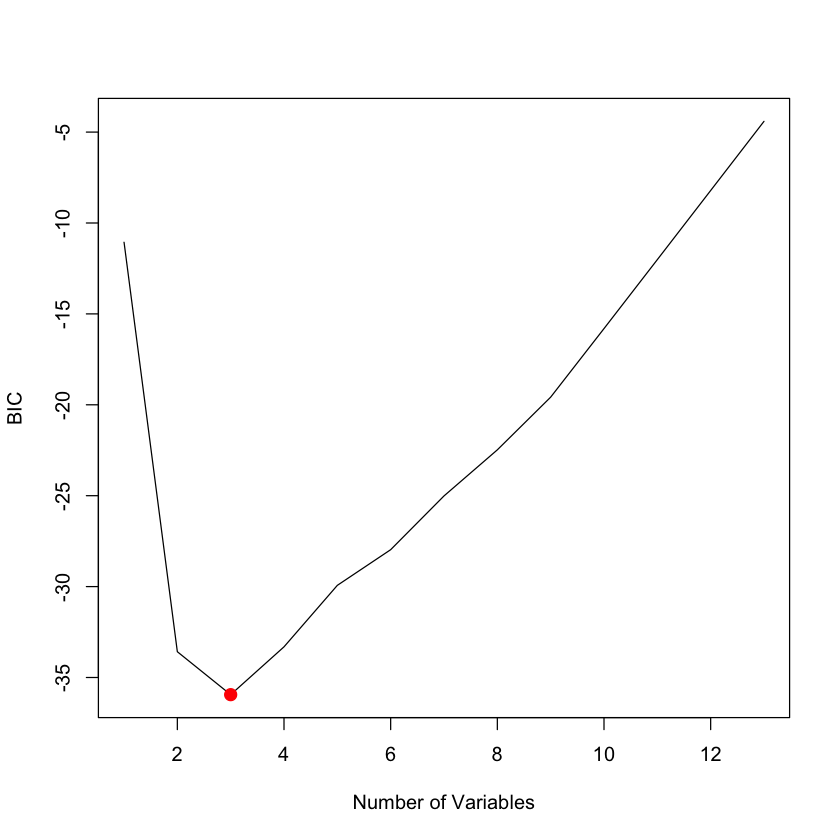

In [51]:
plot(reg.summary$cp, xlab = "Number of Variables",
    ylab = "Cp", type = "l")
which.min(reg.summary$cp) 
points (3, reg.summary$cp[3] , col = "red", cex = 2,
    pch = 20)
which.min(reg.summary$bic)
plot(reg.summary$bic , xlab = "Number of Variables",
    ylab = "BIC", type = "l")
points (3, reg.summary$bic [3], col = "red", cex = 2,
pch = 20)

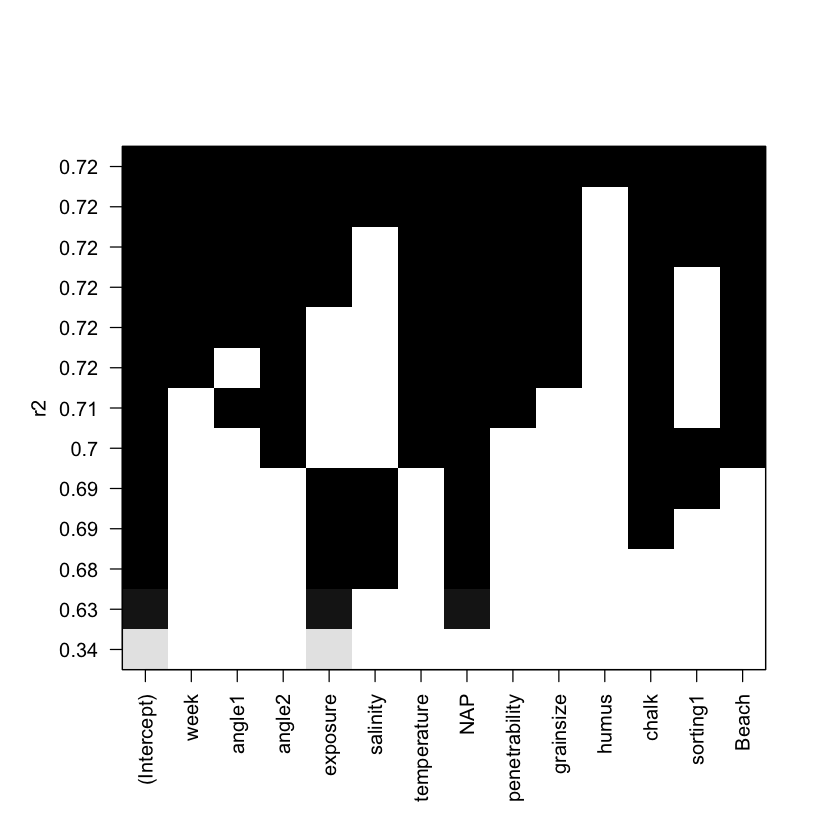

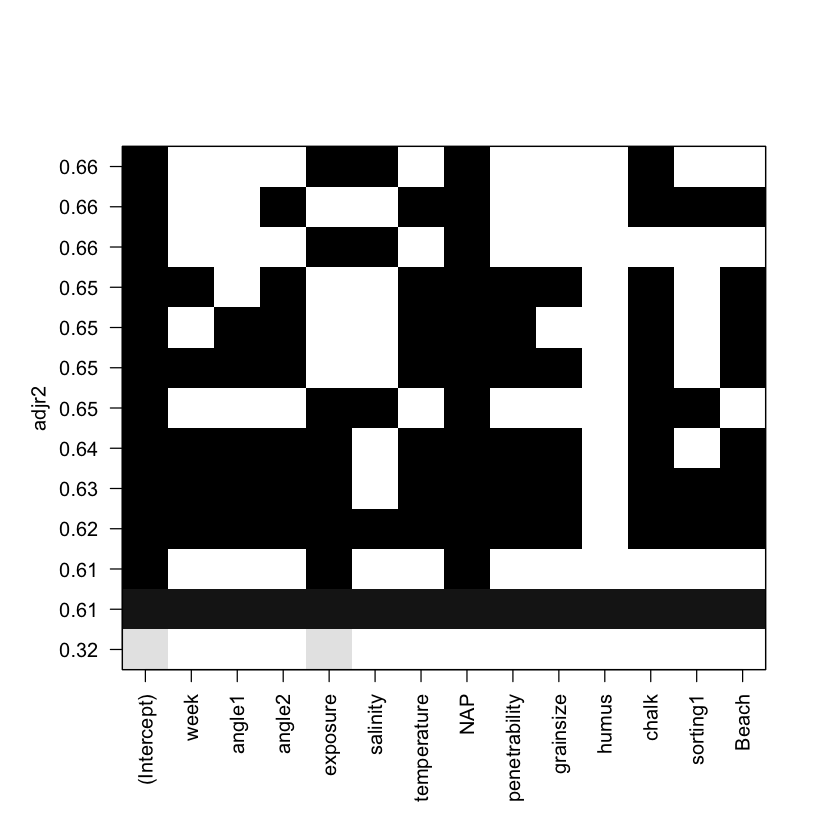

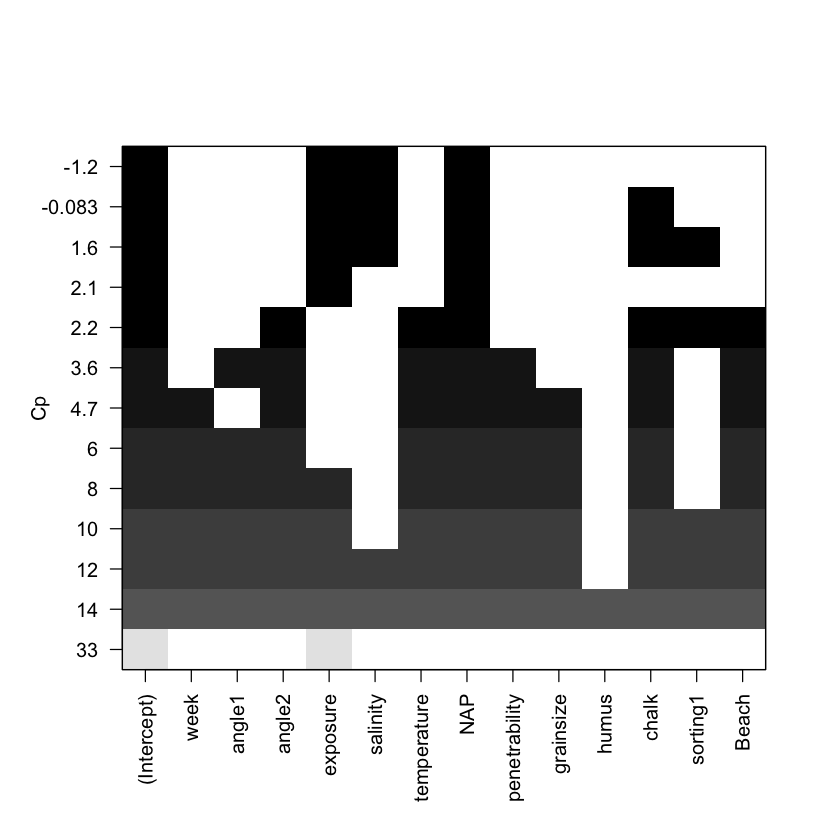

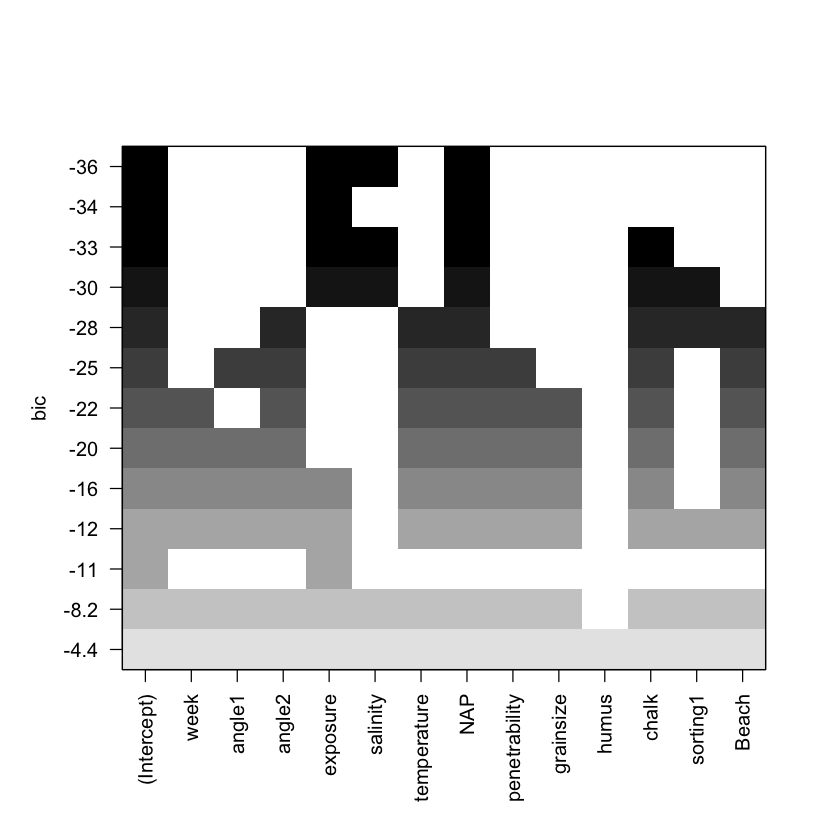

In [52]:
plot(regfit.full , scale = "r2")
plot(regfit.full , scale = "adjr2")
plot(regfit.full , scale = "Cp")
plot(regfit.full , scale = "bic")

top row of each plot has black square for each variable selected according to optimal model associated with statistic

In [53]:
## could use some help interpreting these plots!

## for code below, how do I know which variable to look at???

In [54]:
coef(regfit.full, 3)

(Intercept)    exposure    salinity         NAP 
   0.574551   -2.320101    1.058035   -2.588074

## Forward and Backward Stepwise Selection

In [55]:
regfit.fwd <- regsubsets(richness ~ ., data = survey_data_richness, 
            nvmax = 13, method = "forward")
summary(regfit.fwd)
regfit.bwd <- regsubsets(richness ~ ., data = survey_data_richness, 
            nvmax = 13, method = "backward")
summary(regfit.bwd)

Subset selection object
Call: regsubsets.formula(richness ~ ., data = survey_data_richness, 
    nvmax = 13, method = "forward")
13 Variables  (and intercept)
              Forced in Forced out
week              FALSE      FALSE
angle1            FALSE      FALSE
angle2            FALSE      FALSE
exposure          FALSE      FALSE
salinity          FALSE      FALSE
temperature       FALSE      FALSE
NAP               FALSE      FALSE
penetrability     FALSE      FALSE
grainsize         FALSE      FALSE
humus             FALSE      FALSE
chalk             FALSE      FALSE
sorting1          FALSE      FALSE
Beach             FALSE      FALSE
1 subsets of each size up to 13
Selection Algorithm: forward
          week angle1 angle2 exposure salinity temperature NAP penetrability
1  ( 1 )  " "  " "    " "    "*"      " "      " "         " " " "          
2  ( 1 )  " "  " "    " "    "*"      " "      " "         "*" " "          
3  ( 1 )  " "  " "    " "    "*"      "*"      " "         

Subset selection object
Call: regsubsets.formula(richness ~ ., data = survey_data_richness, 
    nvmax = 13, method = "backward")
13 Variables  (and intercept)
              Forced in Forced out
week              FALSE      FALSE
angle1            FALSE      FALSE
angle2            FALSE      FALSE
exposure          FALSE      FALSE
salinity          FALSE      FALSE
temperature       FALSE      FALSE
NAP               FALSE      FALSE
penetrability     FALSE      FALSE
grainsize         FALSE      FALSE
humus             FALSE      FALSE
chalk             FALSE      FALSE
sorting1          FALSE      FALSE
Beach             FALSE      FALSE
1 subsets of each size up to 13
Selection Algorithm: backward
          week angle1 angle2 exposure salinity temperature NAP penetrability
1  ( 1 )  " "  " "    " "    " "      " "      " "         "*" " "          
2  ( 1 )  " "  " "    " "    " "      " "      "*"         "*" " "          
3  ( 1 )  " "  " "    " "    " "      " "      "*"       

In [56]:
## what is forward vs backward? 

In [57]:
coef(regfit.full, 5)

# How do I know what variable number this should be??? 

(Intercept)    exposure    salinity         NAP       chalk    sorting1 
-0.23781600 -2.26367558  1.04540358 -2.68507816 -0.08870704  0.01360055

In [58]:
coef(regfit.fwd, 5)

(Intercept)    exposure    salinity         NAP       chalk    sorting1 
-0.23781600 -2.26367558  1.04540358 -2.68507816 -0.08870704  0.01360055

In [59]:
coef(regfit.bwd, 5)

(Intercept)   temperature           NAP penetrability         chalk 
-16.983851949   1.578451954  -3.027764605  -0.004783924  -0.144060673 
        Beach 
 -0.675692903

## Choosing Among Models Using the Validation-Set Approach and Cross-Validation

Using only training observations to perform model-fitting, including variable selection.  If the full dataset is used to perform best subset selection step, the validation set errors and cross-validation errors will not be accurate estimates of test error.  

1. Split observations into training set and test set
2. Create random vector, train, of elements = TRUE if corresponding observation is in training set and FALSE otherwise
3. The vector test has a TRUE if the observation is in the test set and FALSE otherwise
4. Note ! in command to create test causes TRUE switch to FALSE
5. We also set a random seed so that the user will obstian the same training set/test set split

In [60]:
set.seed(1)
train <- sample(c(TRUE,FALSE), nrow(survey_data_richness), replace=TRUE)
test <- (!train)

In [61]:
regfit.best <- regsubsets(richness ~., 
    data = survey_data_richness[train, ], nvmax = 13)

In [62]:
test.mat <- model.matrix(richness ~., data = survey_data_richness[test, ])

In [63]:
val.errors <- rep(NA, 13)
for (i in 1:13) {
 coefi <- coef(regfit.best , id = i)
 pred <- test.mat[, names(coefi)] %*% coefi
 val.errors[i] <- mean ((survey_data_richness$richness[test] - pred)^2)
}

In [65]:
## HELP!

In [66]:
val.errors

[1] 18.857606 11.263173  5.908526 16.222727 15.203819 12.238642 22.924678
 [8] 21.932974 33.453819 34.375640 43.489042 41.046507 38.951389

In [67]:
which.min(val.errors)

[1] 3

In [68]:
coef(regfit.best, 3)

(Intercept)    exposure    salinity         NAP 
 -16.711996   -1.510040    1.366298   -2.635254

In [69]:
predict.regsubsets <- function(object, newdata, id, ...) {
    form <- as.formula(object$call[[2]])
    mat <- model.matrix(form, newdata)
    coefi <- coef(object, id=id)
    xvars <- names(coefi)
    mat[, xvars] %*% coefi
}

In [70]:
regfit.best <- regsubsets(richness~., data=survey_data_richness, nvmax=13)
coef(regfit.best, 3)

(Intercept)    exposure    salinity         NAP 
   0.574551   -2.320101    1.058035   -2.588074

In [72]:
k <- 10
n <- nrow(survey_data_richness)
set.seed(1)
folds <- sample(rep(1:k, length = n))
cv.errors <- matrix(NA, k, 13,
    dimnames = list(NULL, paste(1:13)))

In [76]:
for (j in 1:k) {
    best.fit <- regsubsets(richness~ .,
        data = survey_data_richness[folds != j, ],
        nvmax = 13)
    for (i in 1:13) {
        pred <- predict(best.fit , survey_data_richness[folds == j, ], id = i)
        cv.errors [j, i] <-
        mean (( survey_data_richness$richness[folds == j] - pred)^2)
 }
 }

In [77]:
mean.cv.errors <- apply(cv.errors, 2, mean)
mean.cv.errors

1         2         3         4         5         6         7         8 
21.194419  9.356904  9.987575 10.475829 11.714871 11.607889 11.831516 11.036036 
        9        10        11        12        13 
10.051256 10.385415 10.747278 10.962712 10.978410

In [78]:
reg.best <- regsubsets(richness ~., data=survey_data_richness,
    nvmax = 13)
    coef(reg.best, 10)

(Intercept)          week        angle1        angle2      exposure 
-24.196069599   1.451750747  -0.008747078   0.078745551  -0.275227445 
  temperature           NAP penetrability     grainsize         chalk 
  1.566897940  -2.711544963  -0.009042438   0.018220664  -0.115248301 
        Beach 
 -0.940811982